In [2]:
import pandas as pd
import os
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
DATA_PATH = "data/milan/"

## House sale prices

In [101]:
monthly_price = pd.read_excel(DATA_PATH + 'avg_sale_price_per_month.xlsx', sheet_name='Data').iloc[4:, 1:]
monthly_price.columns = ['Date', 'Price €/m2']
monthly_price[['Month', 'Year']] = monthly_price['Date'].str.split(expand=True)
monthly_price['Year'] = monthly_price['Year'].astype(int)

area_sale = pd.read_excel(DATA_PATH + 'avg_sale_price_by_area.xlsx', sheet_name='Data').iloc[4:, 1:]
area_sale.columns = ['Neighbourhood', 'Sale Price']

In [102]:
monthly_price.head()

,Date,Price €/m2,Month,Year
4,Dec 16,3687.0,Dec,16
5,Jan 17,3702.0,Jan,17
6,Feb 17,3702.0,Feb,17
7,Mar 17,3710.0,Mar,17
8,Apr 17,3713.0,Apr,17


In [104]:
area_sale.head()

,Neighbourhood,Sale Price
4,Centro,10346.0
5,"Garibaldi, Moscova, Porta Nuova",9852.0
6,"Arco della Pace, Arena, Pagano",9291.0
7,"Quadronno, Palestro, Guastalla",8676.0
8,"Porta Venezia, Indipendenza",7736.0


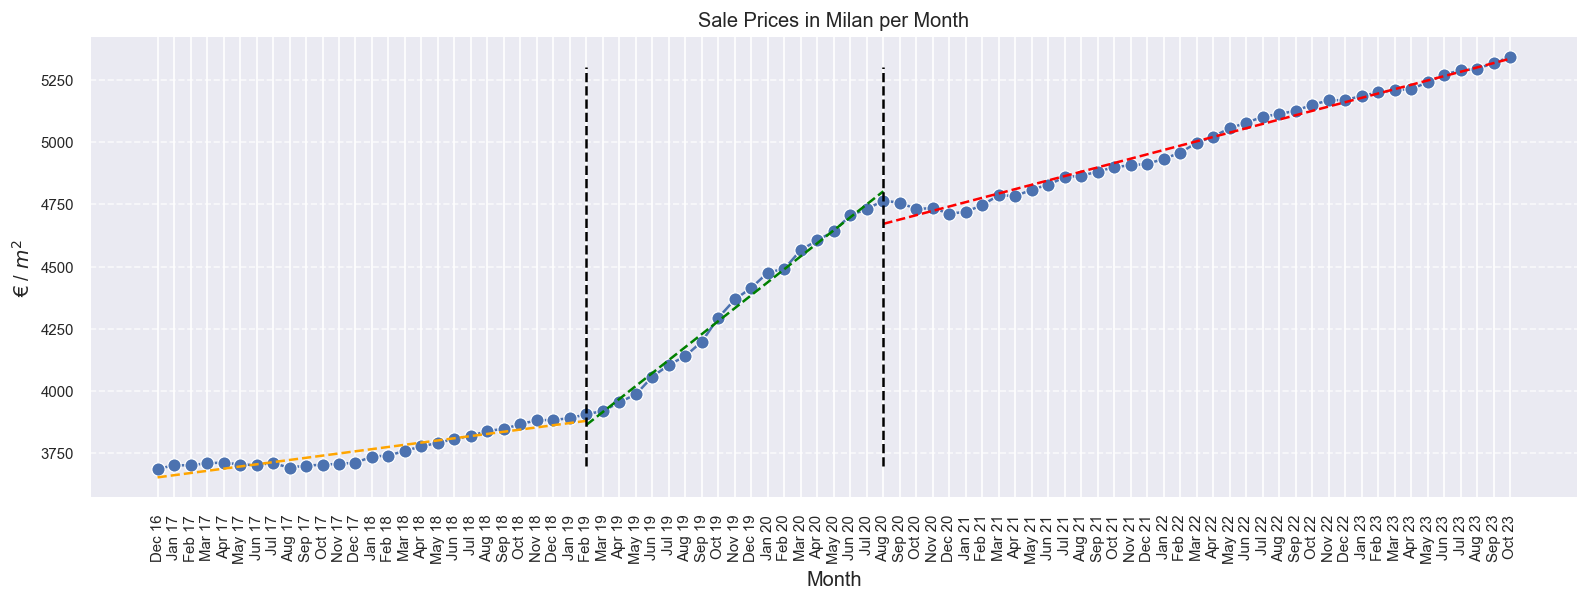

In [110]:
plt.figure(figsize=(16, 5), dpi=120)
# add linear regression line
sns.lineplot(data=monthly_price, x='Date', y='Price €/m2', marker='o', markersize=8)

offset_1 = 26
offset_2 = 44

slope_0, intercept_0, *_ = stats.linregress(np.arange(offset_1+1), monthly_price['Price €/m2'].iloc[:offset_1+1])
slope_1, intercept_1, *_ = stats.linregress(np.arange(offset_1, offset_2+1), monthly_price['Price €/m2'].iloc[offset_1:offset_2+1])
slope_2, intercept_2, *_ = stats.linregress(np.arange(offset_2, len(monthly_price)), monthly_price['Price €/m2'].iloc[offset_2:])

line_0 = slope_0 * np.arange(offset_1+1) + intercept_0
line_1 = slope_1 * np.arange(offset_1, offset_2+1) + intercept_1
line_2 = slope_2 * np.arange(offset_2, len(monthly_price)) + intercept_2

sns.lineplot(x=monthly_price['Date'].iloc[:offset_1+1], y=line_0, color='orange', linestyle='--', linewidth=1.5)
sns.lineplot(x=monthly_price['Date'].iloc[offset_1:offset_2+1], y=line_1, color='green', linestyle='--', linewidth=1.5)
sns.lineplot(x=monthly_price['Date'].iloc[offset_2:], y=line_2, color='red', linestyle='--', linewidth=1.5)

plt.vlines(x=offset_1, ymin=3700, ymax=5300, color='black', linestyle='--', linewidth=1.5)
plt.vlines(x=offset_2, ymin=3700, ymax=5300, color='black', linestyle='--', linewidth=1.5)

plt.title('Sale Prices in Milan per Month')
plt.xlabel('Month')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('€ / $m^2$')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('img/milan_house_prices_by_quarter.png', dpi=300)

plt.show()

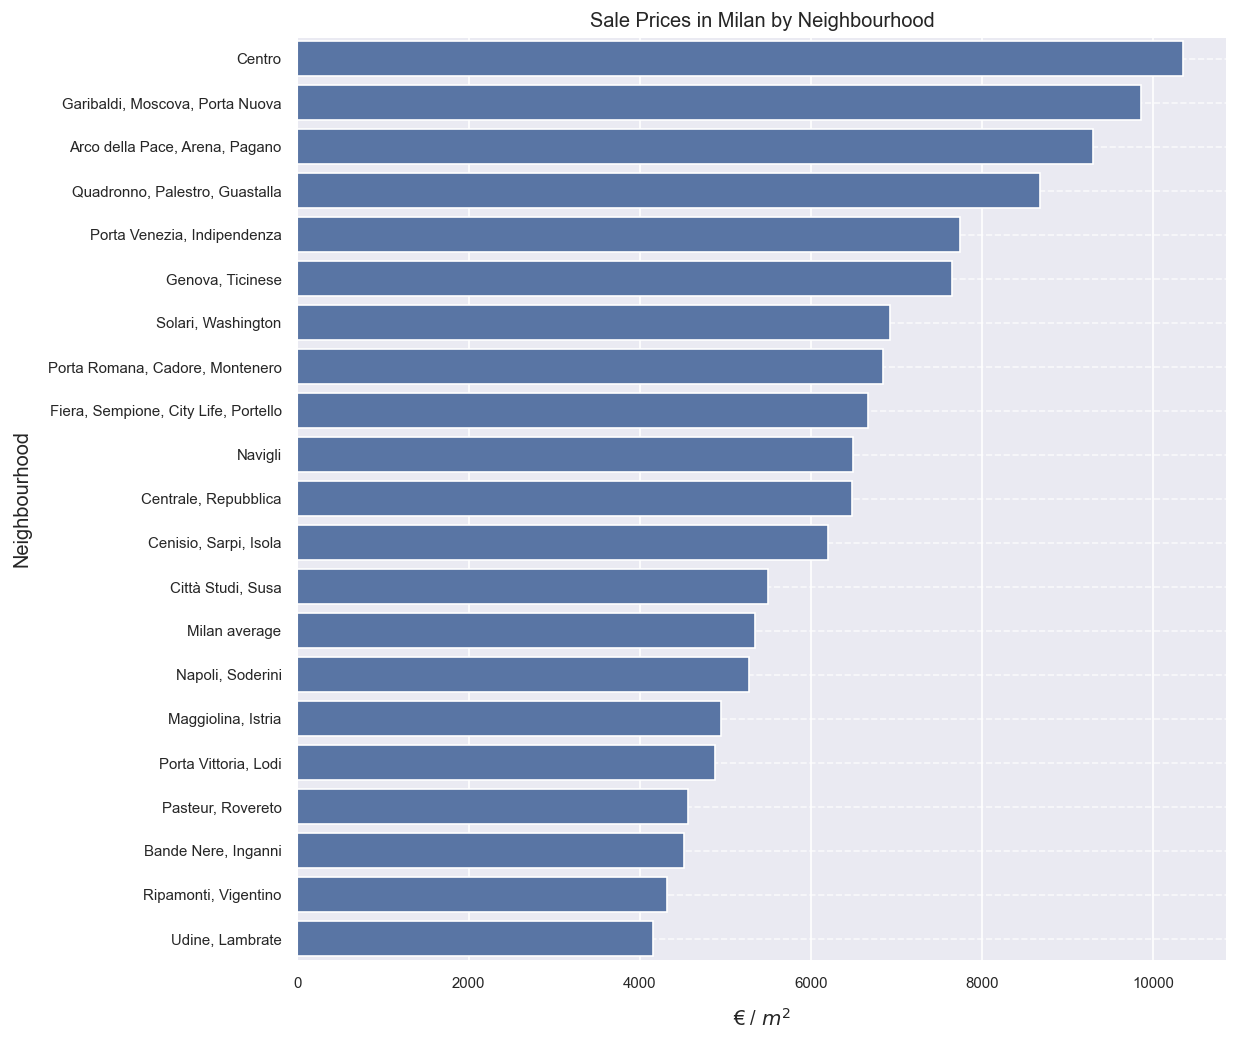

In [111]:
plt.figure(figsize=(10, 10), dpi=120)
# add linear regression line
sns.barplot(data=area_sale, y='Neighbourhood', x='Sale Price', orient='h')

plt.title('Sale Prices in Milan by Neighbourhood')
plt.xlabel('€ / $m^2$', labelpad=10)
plt.ylabel('Neighbourhood', labelpad=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('img/milan_house_prices_by_quarter.png', dpi=300)

plt.show()

## House rent prices

In [133]:
area_rent = pd.read_excel(DATA_PATH + 'avg_rent_price_by_area.xlsx', sheet_name='Data').iloc[4:, 1:]
area_rent.columns = ['Neighbourhood', 'Rent Price']

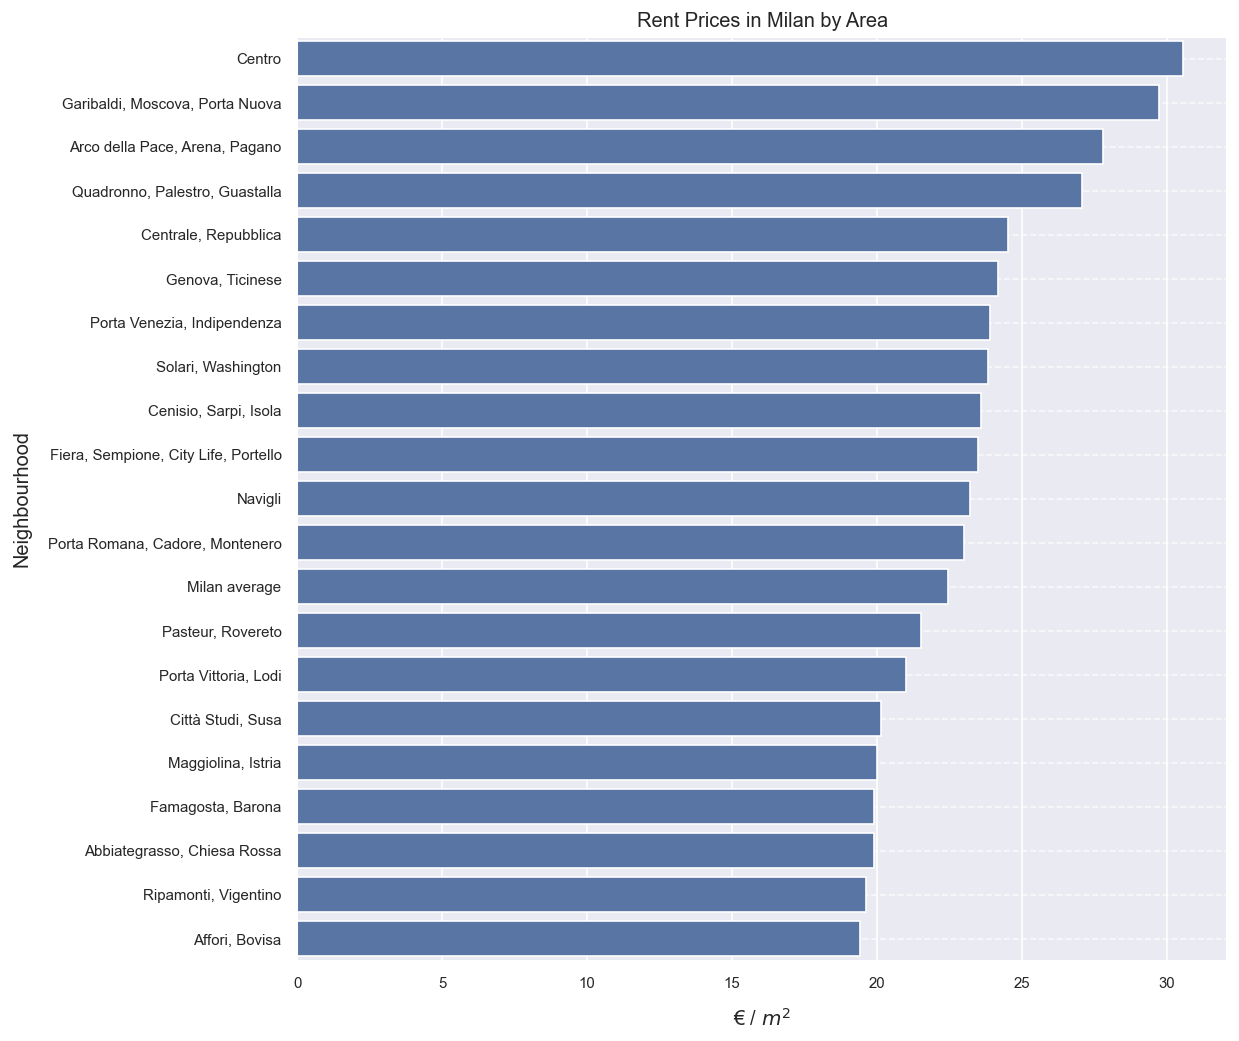

In [134]:
plt.figure(figsize=(10, 10), dpi=120)
# add linear regression line
sns.barplot(data=area_rent, y='Neighbourhood', x='Rent Price', orient='h')

plt.title('Rent Prices in Milan by Area')
plt.xlabel('€ / $m^2$', labelpad=10)
plt.ylabel('Neighbourhood', labelpad=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('img/milan_house_prices_by_quarter.png', dpi=300)

plt.show()

In [140]:
# Sale vs. Rent
normalized_area_price = area_sale.copy().join(area_rent.set_index('Neighbourhood'), on='Neighbourhood').dropna()
normalized_area_price['Price Ratio'] = (normalized_area_price['Sale Price'] / normalized_area_price['Rent Price']).fillna(0)

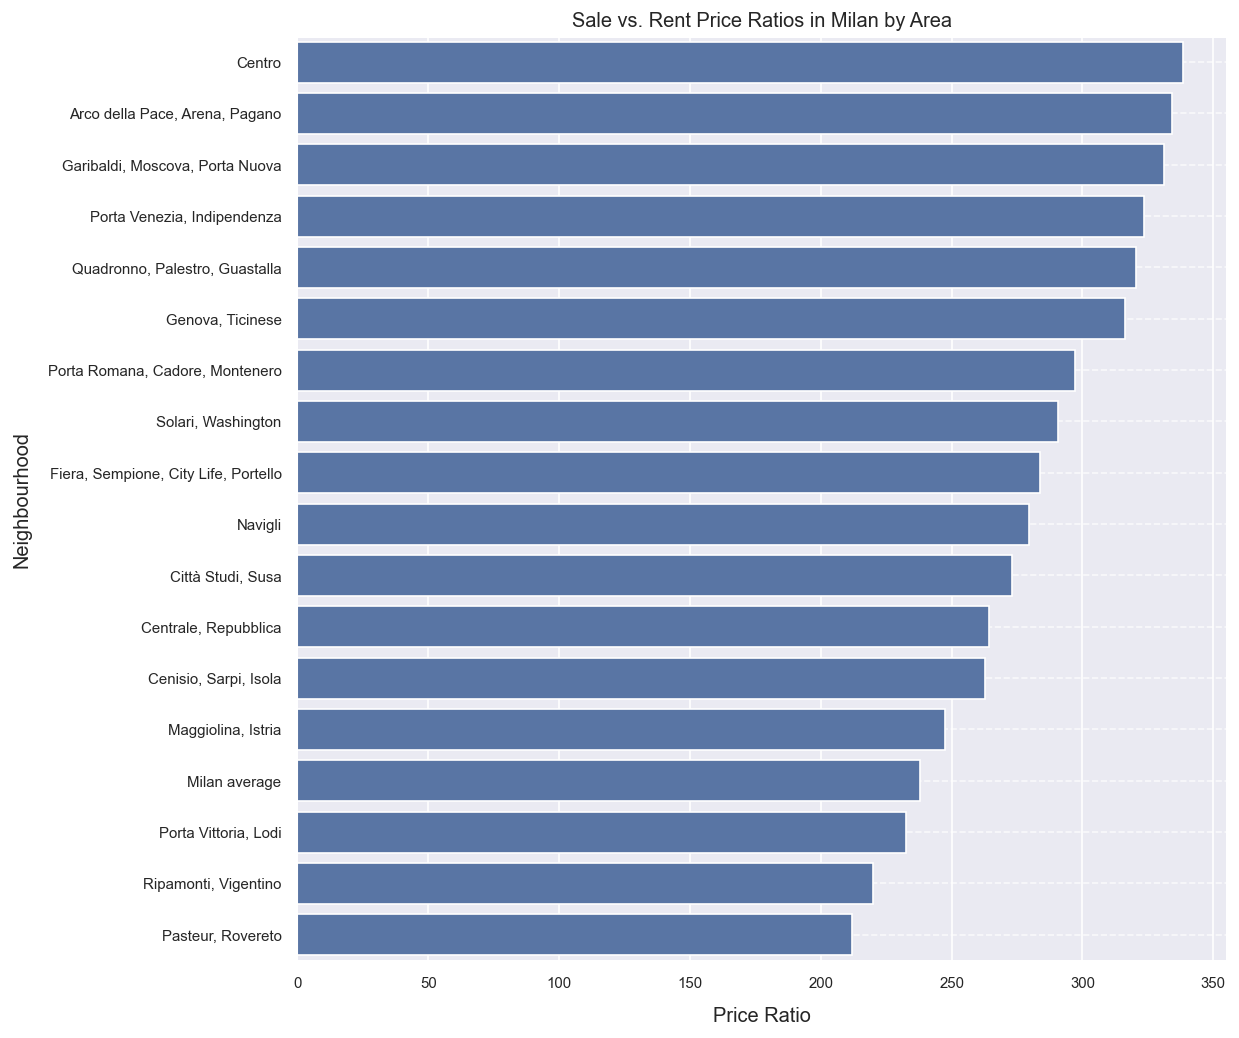

In [141]:
plt.figure(figsize=(10, 10), dpi=120)
# add linear regression line
sns.barplot(data=normalized_area_price.sort_values('Price Ratio', ascending=False), y='Neighbourhood', x='Price Ratio', orient='h')

plt.title('Sale vs. Rent Price Ratios in Milan by Area')
plt.xlabel('Price Ratio', labelpad=10)
plt.ylabel('Neighbourhood', labelpad=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('img/milan_house_prices_by_quarter.png', dpi=300)

plt.show()

## Reviews

In [8]:
reviews = pd.read_csv(DATA_PATH + "reviews.csv")
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')
#reviews = reviews[reviews['date'] > '2014-03-31']
reviews.set_index('date', inplace=True)
reviews.head()

,listing_id
date,
2010-04-19,6400
2011-04-16,6400
2012-04-22,6400
2014-04-11,6400
2014-04-14,6400


In [9]:
yearly_counts = reviews.groupby(pd.Grouper(freq='YE')).size()
yearly_counts.index = yearly_counts.index.strftime('%Y')

monthly_counts = reviews.groupby(pd.Grouper(freq='M')).size()
monthly_counts = monthly_counts[monthly_counts.index > '2016-12-1']
monthly_counts.index = monthly_counts.index.strftime('%b %Y')

monthly_counts.head()

/var/folders/_v/2m0mxgk14csgpyktpk5mjh_40000gn/T/ipykernel_81527/2656348558.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = reviews.groupby(pd.Grouper(freq='M')).size()


date
Dec 2016    1818
Jan 2017    2170
Feb 2017    2586
Mar 2017    2402
Apr 2017    4093
dtype: int64

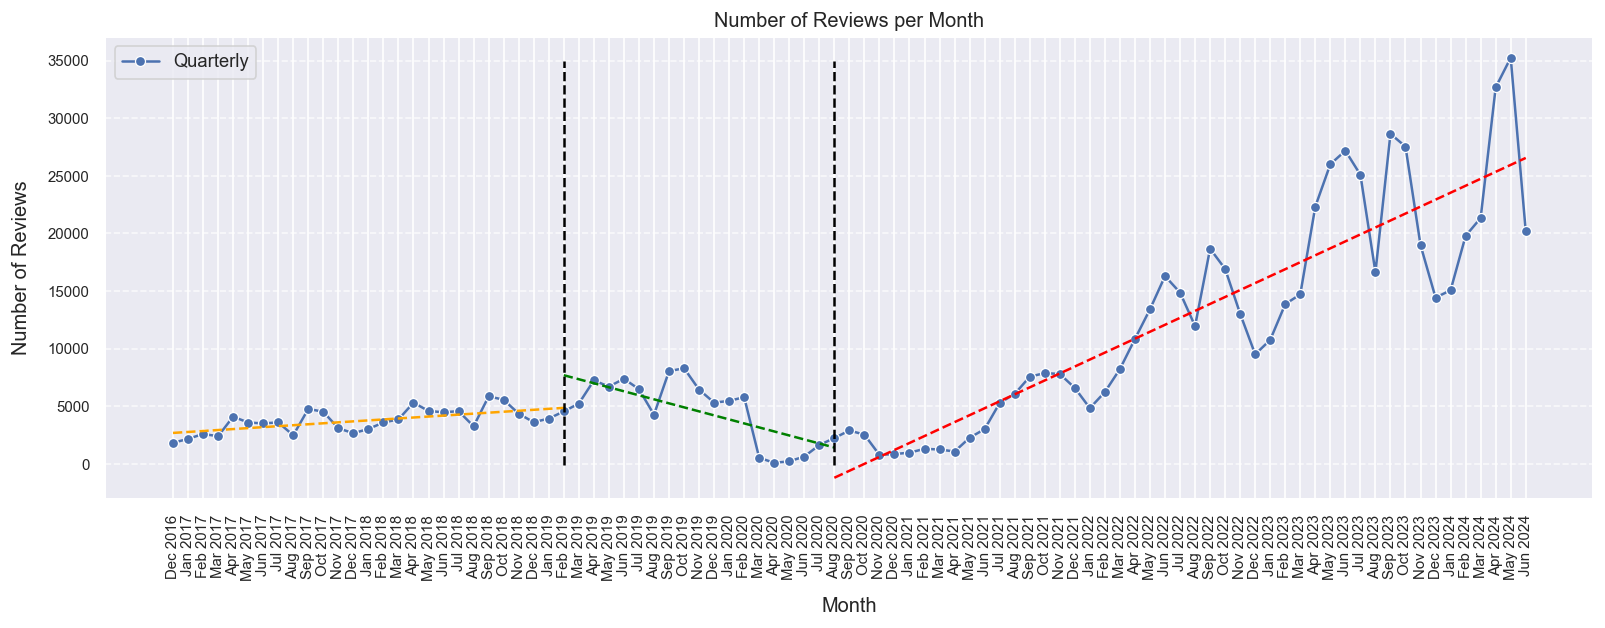

In [10]:
plt.figure(figsize=(16, 5), dpi=120)
sns.lineplot(data=monthly_counts, marker='o', label='Quarterly')
plt.title('Number of Reviews per Month')
plt.xlabel('Month', labelpad=10)
plt.ylabel('Number of Reviews', labelpad=10)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

offset_1 = 26
offset_2 = 44

slope_0, intercept_0, *_ = stats.linregress(np.arange(offset_1+1), monthly_counts.iloc[:offset_1+1])
slope_1, intercept_1, *_ = stats.linregress(np.arange(offset_1, offset_2+1), monthly_counts.iloc[offset_1:offset_2+1])
slope_2, intercept_2, *_ = stats.linregress(np.arange(offset_2, len(monthly_counts)), monthly_counts.iloc[offset_2:])

line_0 = slope_0 * np.arange(offset_1+1) + intercept_0
line_1 = slope_1 * np.arange(offset_1, offset_2+1) + intercept_1
line_2 = slope_2 * np.arange(offset_2, len(monthly_counts)) + intercept_2

sns.lineplot(x=monthly_counts.index[:offset_1+1], y=line_0, color='orange', linestyle='--', linewidth=1.5)
sns.lineplot(x=monthly_counts.index[offset_1:offset_2+1], y=line_1, color='green', linestyle='--', linewidth=1.5)
sns.lineplot(x=monthly_counts.index[offset_2:], y=line_2, color='red', linestyle='--', linewidth=1.5)

plt.vlines(x=offset_1, ymin=-100, ymax=35000, color='black', linestyle='--', linewidth=1.5)
plt.vlines(x=offset_2, ymin=-100, ymax=35000, color='black', linestyle='--', linewidth=1.5)
plt.savefig('img/milan_reviews_by_quarter.png', dpi=300)

plt.show()

### Salaries

In [11]:
annual_salary = pd.read_excel(DATA_PATH + 'avg_salary_italy.xlsx', sheet_name='Data').iloc[4:, 1:-1].reset_index(drop=True)
annual_salary.columns = ['Year', 'Salary']
annual_salary['Year'] = annual_salary['Year'].astype(str)

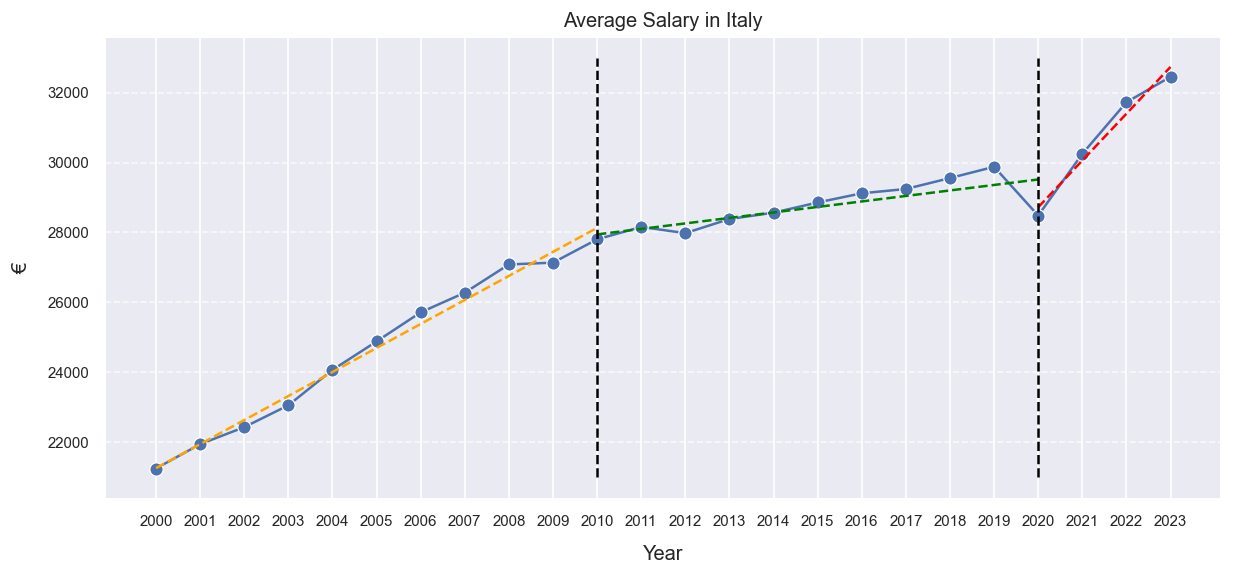

In [12]:
plt.figure(figsize=(12, 5), dpi=120)
# add linear regression line
sns.lineplot(data=annual_salary, x='Year', y='Salary', marker='o', markersize=8)

offset_1 = 10
offset_2 = 20

slope_0, intercept_0, *_ = stats.linregress(np.arange(offset_1+1), annual_salary['Salary'].iloc[:offset_1+1])
slope_1, intercept_1, *_ = stats.linregress(np.arange(offset_1, offset_2+1), annual_salary['Salary'].iloc[offset_1:offset_2+1])
slope_2, intercept_2, *_ = stats.linregress(np.arange(offset_2, len(annual_salary)), annual_salary['Salary'].iloc[offset_2:])

line_0 = slope_0 * np.arange(offset_1+1) + intercept_0
line_1 = slope_1 * np.arange(offset_1, offset_2+1) + intercept_1
line_2 = slope_2 * np.arange(offset_2, len(annual_salary)) + intercept_2

sns.lineplot(x=annual_salary['Year'].iloc[:offset_1+1], y=line_0, color='orange', linestyle='--', linewidth=1.5)
sns.lineplot(x=annual_salary['Year'].iloc[offset_1:offset_2+1], y=line_1, color='green', linestyle='--', linewidth=1.5)
sns.lineplot(x=annual_salary['Year'].iloc[offset_2:], y=line_2, color='red', linestyle='--', linewidth=1.5)

plt.vlines(x=offset_1, ymin=21000, ymax=33000, color='black', linestyle='--', linewidth=1.5)
plt.vlines(x=offset_2, ymin=21000, ymax=33000, color='black', linestyle='--', linewidth=1.5)

plt.title('Average Salary in Italy')
plt.xlabel('Year', labelpad=10)
plt.ylabel('€', labelpad=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('img/milan_house_prices_by_quarter.png', dpi=300)

plt.show()

## Listings

In [13]:
listings = pd.read_csv(DATA_PATH + "listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20240622024403,2024-06-22,city scrape,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,...,5.00,4.56,4.67,NaN,f,1,0,1,0,0.06
1,304050,https://www.airbnb.com/rooms/304050,20240622024403,2024-06-23,city scrape,Good starting point to discover Mi,NaN,NaN,https://a0.muscache.com/pictures/4234186/e05e9...,1566887,...,4.97,4.80,4.90,NaN,f,2,1,1,0,1.92
2,23986,https://www.airbnb.com/rooms/23986,20240622024403,2024-06-22,city scrape,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,...,4.74,4.70,4.48,NaN,f,1,1,0,0,0.18
3,309905,https://www.airbnb.com/rooms/309905,20240622024403,2024-06-22,city scrape,"Navigli LOFT, with private garden",A sunny two-floor loft with private garden,NaN,https://a0.muscache.com/pictures/4088248/415c2...,1593809,...,4.94,4.46,4.65,NaN,f,1,1,0,0,0.35
4,40470,https://www.airbnb.com/rooms/40470,20240622024403,2024-06-22,city scrape,Giacinto Cosy & clean flat near MM1,NaN,NaN,https://a0.muscache.com/pictures/891684/01c17b...,174203,...,4.88,4.43,4.53,NaN,f,2,2,0,0,0.26


In [14]:
listings['host_since'] = pd.to_datetime(listings['host_since'], format='%Y-%m-%d')
listings.set_index('host_since', inplace=True)
host_since = listings.groupby(pd.Grouper(freq='Y')).size()
host_since.index = host_since.index.strftime('%Y')
print("\nHost since:\n", host_since)



Host since:
 host_since
2009       7
2010      56
2011     365
2012    1591
2013    2155
2014    3082
2015    3473
2016    2399
2017    1752
2018    1581
2019    1303
2020     817
2021    1072
2022    1583
2023    2116
2024     994
dtype: int64


/var/folders/_v/2m0mxgk14csgpyktpk5mjh_40000gn/T/ipykernel_81527/3575011076.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  host_since = listings.groupby(pd.Grouper(freq='Y')).size()


Barcelona has some of the strictest short-term rental regulations in Europe. Since 2014, the city has stopped issuing new tourist licenses for short-term rentals in an effort to curb the rapid growth of vacation rentals. As a result, the only way to legally operate a short-term rental in Barcelona is to purchase a property that already has a valid tourist license.

We expect the growth in the amount of Airbnb hosts to dramatically stop in 2014 as a result of this limitation

In [15]:
host_since_df = host_since.reset_index()
host_since_df.columns = ['Date', 'New hosts']
host_since_df = host_since_df[host_since_df['Date']!='2024']

In [16]:
host_since_df['Date'] = host_since_df['Date'].apply(lambda x : int(x))

In [17]:
before_2014 = host_since_df[host_since_df['Date'] <= 2014]
after_2014 = host_since_df[host_since_df['Date'] >= 2014]

# Fit linear regression models
slope_before, intercept_before, r_value, p_value, std_err = stats.linregress(before_2014['Date'], before_2014['New hosts'])
slope_after, intercept_after, r_value, p_value, std_err = stats.linregress(after_2014['Date'], after_2014['New hosts'])

host_since_df['3-year MA'] = host_since_df['New hosts'].rolling(window=3).mean()

/var/folders/_v/2m0mxgk14csgpyktpk5mjh_40000gn/T/ipykernel_81527/1412852973.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(before_2014['Date'], intercept_before + slope_before*before_2014['Date'], 'g-', label='Trend before 2014', linestyle='--')
/var/folders/_v/2m0mxgk14csgpyktpk5mjh_40000gn/T/ipykernel_81527/1412852973.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(after_2014['Date'], intercept_after + slope_after*after_2014['Date'], 'r-', label='Trend after 2014', linestyle='--')


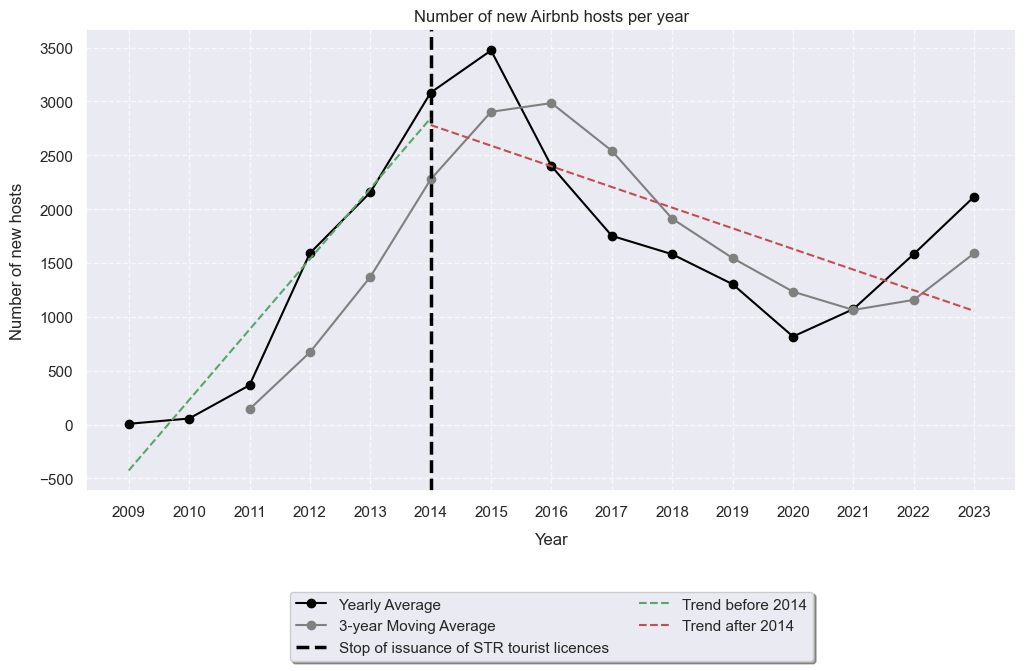

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(host_since_df['Date'], host_since_df['New hosts'], color='black', marker='o', label='Yearly Average')
plt.plot(host_since_df['Date'], host_since_df['3-year MA'], color='grey', marker='o', label='3-year Moving Average')
plt.title('Number of new Airbnb hosts per year')
plt.xlabel('Year', labelpad=10)
plt.ylabel('Number of new hosts', labelpad=10)
plt.xticks(host_since_df['Date'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=2014,  linestyle='--', linewidth=2.5, color='black', label='Stop of issuance of STR tourist licences')
plt.plot(before_2014['Date'], intercept_before + slope_before*before_2014['Date'], 'g-', label='Trend before 2014', linestyle='--')
plt.plot(after_2014['Date'], intercept_after + slope_after*after_2014['Date'], 'r-', label='Trend after 2014', linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
plt.show()

#### Checking minimum nights setting

In [19]:
minimum_nights = listings.minimum_nights.value_counts().sort_index()
minimum_nights = minimum_nights.reset_index()
minimum_nights.columns = ['minimum_nights', 'count']
minimum_nights = minimum_nights[minimum_nights['count']>2]

In [20]:
minimum_nights['type_of_stay'] = minimum_nights['minimum_nights'].apply(lambda x: 'Long stay' if x>31 else 'Short stay')

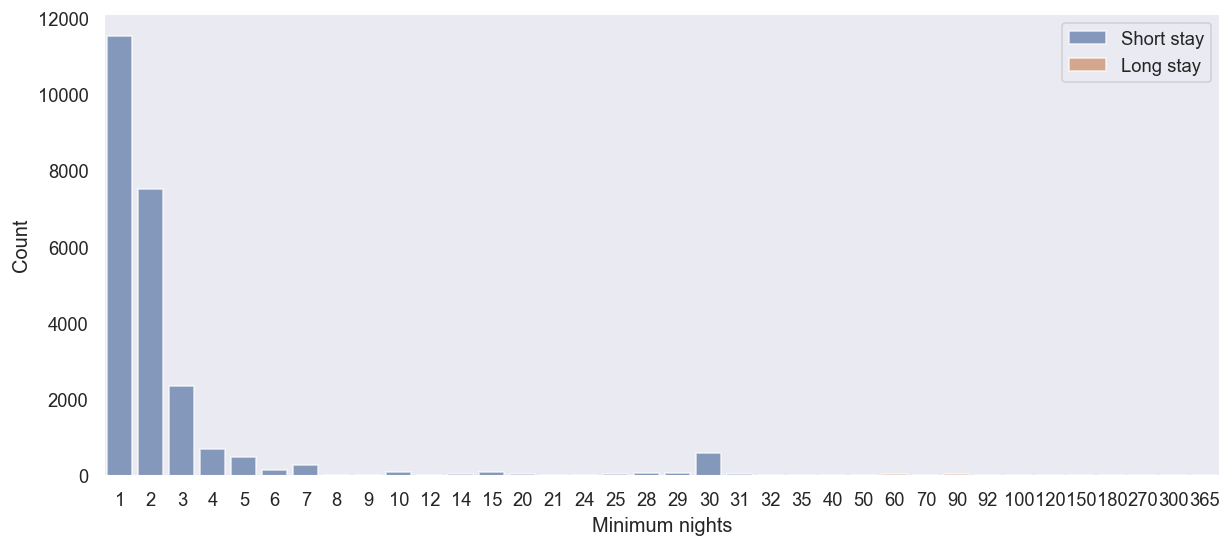

In [21]:
plt.figure(figsize=(12,5), dpi=120)
sns.barplot(x = 'minimum_nights', y='count', data = minimum_nights, hue='type_of_stay', alpha=0.7)
plt.xlabel('Minimum nights')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend()
plt.show()

In [67]:
touristy_districts = listings['neighbourhood_cleansed'].value_counts().reset_index()
touristy_districts.columns = ['Neighbourhood', 'Listings']
touristy_districts['Neighbourhood'] = touristy_districts['Neighbourhood'].apply(lambda x: x.replace(' - ', '\n').title())
touristy_districts

,Neighbourhood,Listings
0,Buenos Aires\nVenezia,1917
1,Duomo,1457
2,Sarpi,1051
3,Brera,998
4,Loreto,995
...,...,...
83,Stephenson,4
84,Parco Nord,3
85,Parco Agricolo Sud,2
86,Ronchetto Delle Rane,2


In [68]:
# Threshold for grouping smaller slices (e.g., 5% of the total)
threshold = 1 / 100 * touristy_districts['Listings'].sum()

# Group slices below the threshold
small_slices = touristy_districts[touristy_districts['Listings'] < threshold]
other_sum = small_slices.sum()
new_index = np.where(touristy_districts['Neighbourhood'].isin(small_slices['Neighbourhood']), 'Others', touristy_districts['Neighbourhood'])
touristy_districts_labeled = touristy_districts.copy()
touristy_districts_labeled['Neighbourhood'] = new_index

In [71]:
# Group the 'Other' labels and sum their values
grouped_districts = touristy_districts_labeled.groupby('Neighbourhood').sum()
grouped_districts['Norm Listings'] = grouped_districts['Listings'] / grouped_districts['Listings'].sum()
grouped_districts.sort_values('Listings', ascending=False, inplace=True)

(0.0, 100.0, 0.0, 100.0)

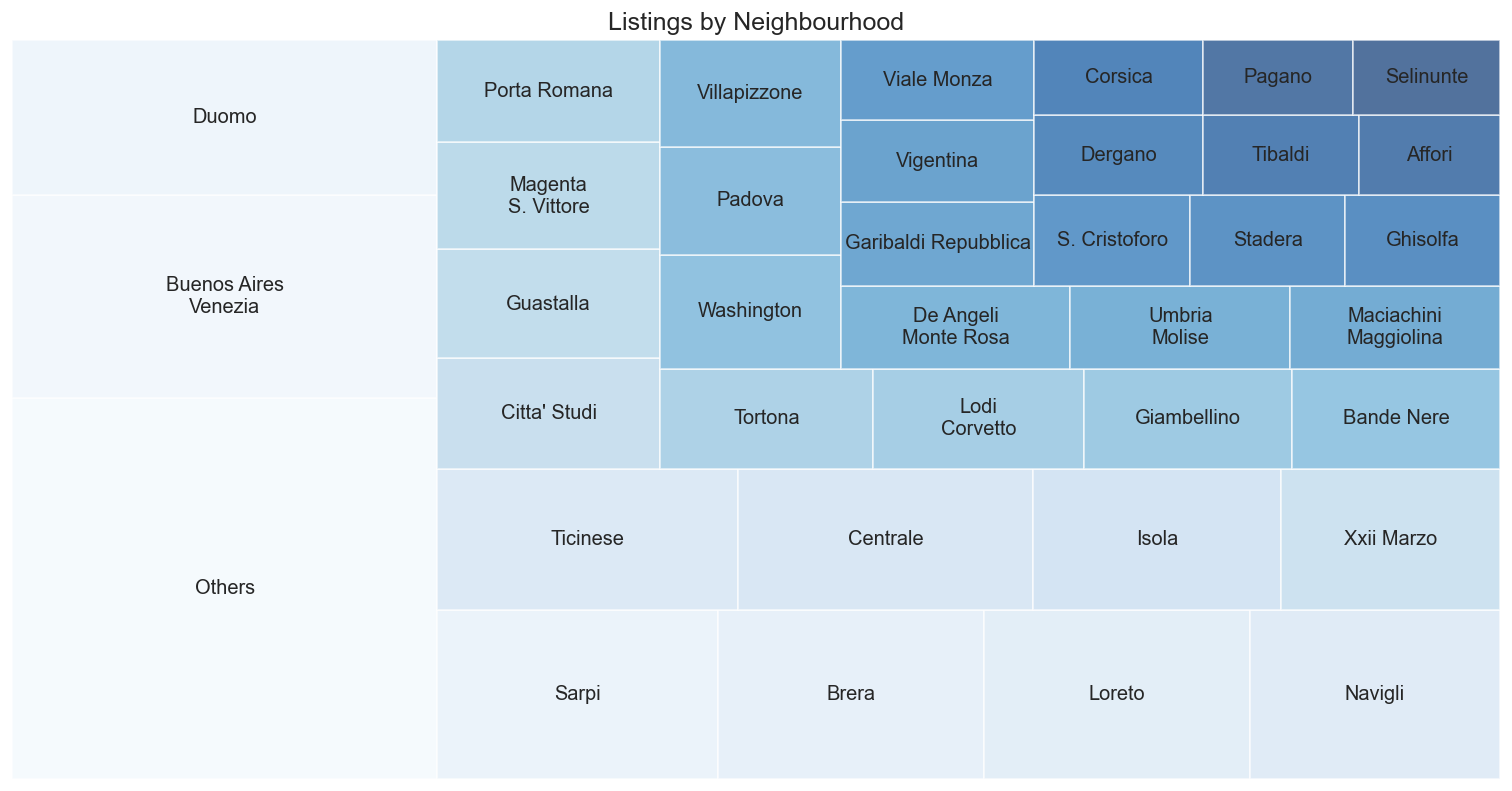

In [77]:
# Treemap
import squarify

plt.figure(figsize=(16, 8), dpi=120)
plt.title('Listings by Neighbourhood', fontsize=15)
squarify.plot(sizes=grouped_districts['Norm Listings'], label=grouped_districts.index, alpha=0.7, color=sns.color_palette('Blues', n_colors=len(grouped_districts)))
plt.axis('off')

In [78]:
listings = listings[listings['first_review'].notna()]
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['first_review'] = listings['first_review'].apply(lambda x: int(x.year))
listings['first_review']

host_since
2009-04-17    2010
2012-01-04    2012
2010-03-19    2012
2012-01-11    2012
2010-07-20    2010
              ... 
2018-05-18    2024
2018-09-11    2024
2022-08-30    2024
2024-05-13    2024
2024-06-18    2024
Name: first_review, Length: 20087, dtype: int64

In [89]:
listings_per_district = listings.groupby(['neighbourhood_cleansed', 'first_review']).size().reset_index()
listings_per_district.columns=['District', 'Year', 'Count']
listings_per_district['District'] = listings_per_district['District'].apply(lambda x: x.title())

In [90]:
high_airbnb_areas = listings_per_district[(listings_per_district['District']=='Duomo') | (listings_per_district['District']=='Buenos Aires - Venezia')]

In [91]:
low_airbnb_areas = pd.concat([listings_per_district, high_airbnb_areas]).drop_duplicates(keep=False)
len(low_airbnb_areas)

847

In [92]:
len(listings_per_district), len(high_airbnb_areas), len(low_airbnb_areas)

(875, 28, 847)